<a href="https://colab.research.google.com/github/ankit-rathi/Tradevesting_v2/blob/main/myStocks_Portfolio_Analysis_v2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [12]:
!pip install pyxirr

In [13]:
import pandas as pd
import numpy as np
from google.colab import drive
drive.mount('/content/drive')
import os
project_path = '/content/drive/My Drive/tradevesting'
os.chdir(project_path)

import warnings
warnings.filterwarnings('ignore')

from google.colab import data_table

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Run date time (IST): 2024-12-30 21:53:04
-------------------
qualified stocks: 88
with latest results: 84
still star stocks: 42
-------------------
Initial Investment:  1.03 C
CY Investment:  1.16 C
Reserve:  3.10 K
Current:  1.18 C
-------------------
Today PnL: -66.92 K (-0.56%)
Current PnL: -9.26 L (-7.97%)
CY Booked + Current PnL: 1.40 L (1.21%)
-------------------
Total profit:  5.33 L
Total loss:  -14.59 L
-------------------
Total Booked + Current PnL: 14.51 L (14.09%)
Total Booked PnL: 23.77 L (23.07%)
Curr Year Booked PnL: 10.66 L (9.05%)
Prev Year Booked PnL: 13.11 L (12.73%)
Est FTT:  1.89 C
Est FTT PnL: 71.49 L (60.69%)
-------------------
Est LTT:  2.47 C
Est LTT PnL: 1.29 C (109.8%)
Deployed:  1.03 C
Current:  1.18 C
CAGR/XIRR %: 11.79%


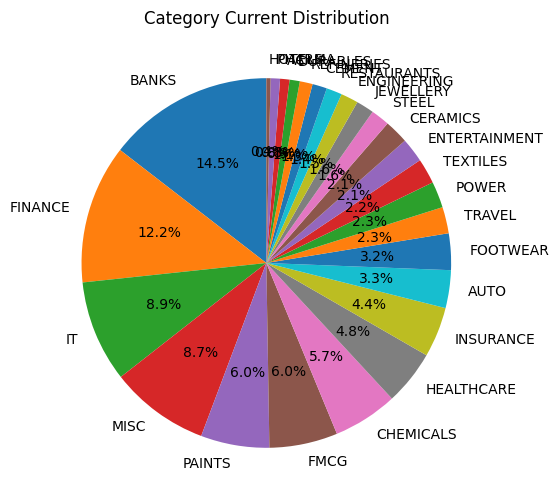

In [14]:
# Import the function from the script
import myStocks_Portfolio_Analysis_v2

eod = 0

# Call the function to get the DataFrame
df_portfolio_features = myStocks_Portfolio_Analysis_v2.get_portfolio_features_v2(eod)
cols = ['Symbol', 'Close', 'FTT', 'Dev%_PE', 'Conviction', 'RSP', 'Current', 'Current P/L', 'FTT Amt', 'Today P/L%', 'Current P/L%', 'FTT%', 'OTT%', 'XIRR', 'RRR Ind', 'CurrAlloc%', 'Gained%', 'Criteria', 'Strategy', 'Category']
df_portfolio_features = df_portfolio_features[cols]

In [15]:
# all portfolio
df_portfolio_features = df_portfolio_features.sort_values(by = 'FTT Amt', ascending=True)
data_table.DataTable(df_portfolio_features, include_index=False)

,Symbol,Close,FTT,Dev%_PE,Conviction,RSP,Current,Current P/L,FTT Amt,Today P/L%,Current P/L%,FTT%,OTT%,XIRR,RRR Ind,CurrAlloc%,Gained%,Criteria,Strategy,Category
29,GLAND,1784.50,2114.00,5.20,H,82.95,96363.0,17310.0,17789.0,-1.44,21.90,18.46,44.40,29.0,0.97,0.82,11.12,XR,NTT,PHARMA
47,LALPATHLAB,2954.90,3450.00,-14.36,H,71.59,106376.0,15660.0,17829.0,0.21,17.26,16.76,36.91,19.0,0.88,0.90,47.80,X40N,NTT,HEALTHCARE
87,VIPIND,482.90,575.00,-318.25,H,36.36,94166.0,-1150.0,17957.0,1.10,-1.21,19.07,17.64,-7.0,-0.06,0.80,11.76,X40N,NTT,MISC
12,BANKBARODA,241.00,288.89,-23.74,M,69.32,95195.0,17878.0,18915.0,-1.63,23.12,19.87,47.59,19.0,0.95,0.81,11.39,XR,ATH,BANKS
15,BAYERCROP,5477.50,6836.59,18.15,H,29.55,87640.0,18095.0,21743.0,-5.56,26.02,24.81,57.29,21.0,0.83,0.74,12.20,X40N,ATH,CHEMICALS
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
63,SAIL,111.73,228.00,50.74,L,35.23,192399.0,-32563.0,200210.0,-3.29,-14.47,104.06,74.53,6.0,-0.16,1.63,4.30,XY24,BTT,STEEL
58,RBLBANK,156.82,388.00,-42.40,M,85.23,159329.0,-74971.0,234883.0,-1.90,-32.00,147.42,68.25,-50.0,-0.32,1.35,3.09,XY24,NTT,BANKS
11,BANDHANBNK,159.00,400.00,-43.14,M,30.68,174423.0,-64218.0,264373.0,-1.11,-26.91,151.57,83.87,-25.0,-0.24,1.48,0.00,XY24,NTT,BANKS
75,TANLA,668.35,2007.31,-40.74,M,38.64,147705.0,-71430.0,295912.0,-1.23,-32.60,200.34,102.44,-32.0,-0.24,1.25,0.55,AR,ATH,IT


In [16]:
# lower current allocation with minimal upside
tmp_df = df_portfolio_features[(df_portfolio_features['CurrAlloc%'] < 1) ]
data_table.DataTable(tmp_df, include_index=False)

,Symbol,Close,FTT,Dev%_PE,Conviction,RSP,Current,Current P/L,FTT Amt,Today P/L%,Current P/L%,FTT%,OTT%,XIRR,RRR Ind,CurrAlloc%,Gained%,Criteria,Strategy,Category
29,GLAND,1784.50,2114.00,5.20,H,82.95,96363.0,17310.0,17789.0,-1.44,21.90,18.46,44.40,29.0,0.97,0.82,11.12,XR,NTT,PHARMA
47,LALPATHLAB,2954.90,3450.00,-14.36,H,71.59,106376.0,15660.0,17829.0,0.21,17.26,16.76,36.91,19.0,0.88,0.90,47.80,X40N,NTT,HEALTHCARE
87,VIPIND,482.90,575.00,-318.25,H,36.36,94166.0,-1150.0,17957.0,1.10,-1.21,19.07,17.64,-7.0,-0.06,0.80,11.76,X40N,NTT,MISC
12,BANKBARODA,241.00,288.89,-23.74,M,69.32,95195.0,17878.0,18915.0,-1.63,23.12,19.87,47.59,19.0,0.95,0.81,11.39,XR,ATH,BANKS
15,BAYERCROP,5477.50,6836.59,18.15,H,29.55,87640.0,18095.0,21743.0,-5.56,26.02,24.81,57.29,21.0,0.83,0.74,12.20,X40N,ATH,CHEMICALS
20,CLEAN,1395.10,1683.00,-9.59,M,95.45,114398.0,439.0,23612.0,-1.93,0.39,20.64,21.10,2.0,0.02,0.97,9.35,XR,NTT,CHEMICALS
19,CERA,7684.95,10420.45,-0.69,H,93.18,76850.0,-13749.0,27359.0,6.84,-15.18,35.60,15.02,-51.0,-0.50,0.65,16.67,X40N,ATH,CERAMICS
70,SIS,362.15,528.00,70.88,M,56.82,61565.0,-19525.0,28197.0,-2.02,-24.08,45.80,10.69,-21.0,-0.69,0.52,0.00,X40N,NTT,MISC
76,TATAELXSI,6925.55,9000.00,-11.28,H,90.91,96958.0,-5694.0,29039.0,0.57,-5.55,29.95,22.74,-5.0,-0.20,0.82,8.64,X40N,NTT,IT
81,TRIDENT,32.87,48.00,67.79,M,55.68,81189.0,-11066.0,37371.0,-0.90,-11.99,46.03,28.51,-11.0,-0.30,0.69,5.15,XR,NTT,TEXTILES


In [17]:
# XSP allocation
tmp_df = df_portfolio_features[(df_portfolio_features['Criteria'] == 'XY24') ]
data_table.DataTable(tmp_df, include_index=False)

,Symbol,Close,FTT,Dev%_PE,Conviction,RSP,Current,Current P/L,FTT Amt,Today P/L%,Current P/L%,FTT%,OTT%,XIRR,RRR Ind,CurrAlloc%,Gained%,Criteria,Strategy,Category
42,JIOFIN,306.25,387.0,-8.15,M,27.27,151288.0,-6911.0,39895.0,0.43,-4.37,26.37,20.85,65.0,-0.17,1.28,30.60,XY24,BTT,FINANCE
18,CAMPUS,319.20,393.0,3.81,M,98.86,181625.0,13850.0,41992.0,1.08,8.25,23.12,33.28,18.0,0.33,1.54,48.81,XY24,NTT,FOOTWEAR
84,UNIONBANK,118.93,163.0,-11.68,L,79.55,135223.0,-5617.0,50114.0,0.90,-3.99,37.06,31.59,-20.0,-0.11,1.15,9.88,XY24,NTT,BANKS
23,DABUR,505.25,735.0,-10.09,H,53.98,128839.0,-3343.0,58583.0,-0.37,-2.53,45.47,41.79,-3.0,-0.06,1.09,3.00,XY24,BTT,FMCG
28,GICRE,444.80,583.0,12.51,L,97.73,194378.0,47957.0,60393.0,-6.00,32.75,31.07,74.00,137.0,0.79,1.65,50.25,XY24,BTT,INSURANCE
54,NHPC,79.75,115.0,185.56,L,70.45,137010.0,-4003.0,60558.0,-0.72,-2.84,44.20,40.11,-85.0,-0.07,1.16,23.03,XY24,NTT,POWER
52,MEDANTA,1078.35,1486.0,-3.25,M,73.86,163909.0,8474.0,61958.0,-1.11,5.45,37.80,45.32,30.0,0.14,1.39,14.17,XY24,NTT,HEALTHCARE
43,JPPOWER,17.59,26.2,-63.28,L,42.05,133209.0,-8633.0,65206.0,-2.98,-6.09,48.95,39.88,85.0,-0.13,1.13,19.25,XY24,NTT,POWER
7,ATULAUTO,567.25,844.0,-14.30,L,45.45,133871.0,-13497.0,65316.0,0.37,-9.16,48.79,35.16,-37.0,-0.21,1.14,19.25,XY24,NTT,AUTO
77,TATAMOTORS,733.65,1065.0,-58.03,M,26.14,150398.0,-13360.0,67920.0,-2.25,-8.16,45.16,33.32,-70.0,-0.20,1.28,1.59,XY24,NTT,AUTO


In [18]:
# XR/AR/SR allocation
tmp_df = df_portfolio_features[df_portfolio_features['Criteria'].isin(['AR','XR','SR'])]
data_table.DataTable(tmp_df, include_index=False)

,Symbol,Close,FTT,Dev%_PE,Conviction,RSP,Current,Current P/L,FTT Amt,Today P/L%,Current P/L%,FTT%,OTT%,XIRR,RRR Ind,CurrAlloc%,Gained%,Criteria,Strategy,Category
29,GLAND,1784.50,2114.00,5.20,H,82.95,96363.0,17310.0,17789.0,-1.44,21.90,18.46,44.40,29.0,0.97,0.82,11.12,XR,NTT,PHARMA
12,BANKBARODA,241.00,288.89,-23.74,M,69.32,95195.0,17878.0,18915.0,-1.63,23.12,19.87,47.59,19.0,0.95,0.81,11.39,XR,ATH,BANKS
20,CLEAN,1395.10,1683.00,-9.59,M,95.45,114398.0,439.0,23612.0,-1.93,0.39,20.64,21.10,2.0,0.02,0.97,9.35,XR,NTT,CHEMICALS
44,JUBLFOOD,718.75,850.00,0.78,M,96.59,161000.0,51834.0,29399.0,1.50,47.48,18.26,74.41,28.0,1.76,1.37,67.11,AR,NTT,RESTAURANTS
81,TRIDENT,32.87,48.00,67.79,M,55.68,81189.0,-11066.0,37371.0,-0.90,-11.99,46.03,28.51,-11.0,-0.30,0.69,5.15,XR,NTT,TEXTILES
48,LAOPALA,318.40,464.00,-15.56,M,31.82,86923.0,-13923.0,39750.0,-0.52,-13.81,45.73,25.61,-41.0,-0.35,0.74,8.32,AR,NTT,CERAMICS
51,MASFIN,268.20,401.09,-27.31,M,65.91,80460.0,-17520.0,39868.0,-1.12,-17.88,49.55,22.81,-74.0,-0.44,0.68,2.17,XR,ATH,FINANCE
36,IEX,178.84,219.00,-3.04,M,84.09,200122.0,50859.0,44947.0,-0.99,34.07,22.46,64.18,28.0,1.13,1.70,35.68,XR,NTT,MISC
17,BSOFT,574.45,844.81,-0.43,M,50.00,100529.0,-9520.0,47309.0,-0.28,-8.65,47.06,34.34,-22.0,-0.20,0.85,5.33,XR,ATH,IT
38,INDUSINDBK,963.50,1800.00,-35.98,M,61.36,54920.0,-22286.0,47682.0,1.06,-28.87,86.82,32.89,-21.0,-0.47,0.47,3.66,XR,NTT,BANKS


In [19]:
# Top N allocation
df_tmp = df_portfolio_features.sort_values(by = 'CurrAlloc%', ascending=False)
top_n_values = [10, 20, 30]

sum_df = pd.DataFrame({
    'Top_N': top_n_values,
    'Sum_Alloc%': [df_tmp['CurrAlloc%'].head(n).sum() for n in top_n_values]
})

sum_df

,Top_N,Sum_Alloc%
0,10,19.64
1,20,34.35
2,30,47.77


In [20]:
# criteria-wise allocation
df_portfolio_features.groupby('Criteria')['CurrAlloc%'].sum().sort_values(ascending=False)

,CurrAlloc%
Criteria,
XY24,41.11
X40,20.08
X40N,14.86
XR,14.46
AR,6.60
X200,1.44
SR,1.42


In [21]:
# sector-wise stats
df_tmp = df_portfolio_features.groupby('Category')[['CurrAlloc%', 'Current', 'Current P/L', 'FTT Amt']].sum().sort_values(by=['Current', 'Current P/L'], ascending=False)
df_tmp['Current P/L%'] = round(df_tmp['Current P/L'] * 100 / df_tmp['Current'], 2)
df_tmp['FTT%'] = round(df_tmp['FTT Amt'] * 100 / df_tmp['Current'], 2)
cols = ['CurrAlloc%', 'Current P/L%', 'FTT%']
df_tmp[cols].sort_values(by=['CurrAlloc%'], ascending=False)

,CurrAlloc%,Current P/L%,FTT%
Category,,,
BANKS,14.52,-11.55,64.50
FINANCE,12.15,-14.16,62.23
IT,8.88,-6.29,59.72
MISC,8.69,0.94,32.97
PAINTS,6.00,-16.50,50.98
FMCG,5.97,-4.21,44.82
CHEMICALS,5.64,-8.78,71.90
HEALTHCARE,4.79,7.63,39.08
INSURANCE,4.39,6.47,43.99


In [22]:
# money to be made criteria-wise
df_portfolio_features.groupby('Criteria')['FTT Amt'].sum().sort_values(ascending=False)

,FTT Amt
Criteria,
XY24,2817220.0
XR,1742949.0
X40N,893719.0
X40,842933.0
AR,625478.0
SR,177808.0
X200,48574.0
